In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.formula.api import ols 
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix, recall_score

import scipy.stats as stats #for plotting q-q plot

Loading Data

In [102]:
data = pd.read_csv("attrition_data_exam.csv")

In [103]:
data

,Age,Attrition,BusinessTravel,DailyRate($),Department,DistanceFromHome,Education,EducationField,EmployeeNumber#,EnvironmentSatisfaction,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,11,3,0.0,8.0,0.0,1,6.0,4.0,NaN,5.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,23,4,1.0,10.0,3.0,3,10.0,7.0,1.0,7.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,3,4,...,15,3,0.0,7.0,3.0,3,0.0,0.0,0.0,0.0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,4,...,11,3,0.0,8.0,3.0,3,8.0,7.0,3.0,0.0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,5,1,...,12,3,1.0,6.0,3.0,3,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2413,33,Yes,Non-Travel,365,Sales,23,5,Marketing,2414,4,...,13,4,0.0,11.0,2.0,3,38.0,1.0,5.0,13.0
2414,43,Yes,Travel_Rarely,1430,Research & Development,21,5,Medical,2415,4,...,25,3,2.0,39.0,3.0,1,35.0,4.0,4.0,16.0
2415,34,Yes,Travel_Frequently,1441,Research & Development,15,1,Technical Degree,2416,2,...,15,4,0.0,33.0,5.0,2,26.0,6.0,11.0,11.0
2416,53,Yes,Travel_Rarely,1238,Sales,3,2,Life Sciences,2417,4,...,14,3,3.0,16.0,6.0,4,4.0,5.0,5.0,13.0


Feature Engineering

In [104]:
#Lets check missing values
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate($)                0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber#             0
EnvironmentSatisfaction     0
Gender                      0
JobLevel                    0
Job+Role                    0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome($)            0
NumCompaniesWorked#        20
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
StockOptionLevel           26
TotalWorkingYears           1
TrainingTimesLastYear       2
WorkLifeBalance             0
YearsAtCompany              2
YearsInCurrentRole          8
YearsSinceLastPromotion    12
YearsWithCurrManager        3
dtype: int64

Looks like we are doing fairly well for missing values, but lets impute/drop them as needed

In [105]:
#Ensuring each row is a different employee
data["EmployeeNumber#"].nunique()

2418

In [106]:
#Dropping Employee Number column as each row is different employee
data = data.drop(columns="EmployeeNumber#")

In [107]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate($)', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobLevel', 'Job+Role',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome($)',
       'NumCompaniesWorked#', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418 entries, 0 to 2417
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      2418 non-null   int64  
 1   Attrition                2418 non-null   object 
 2   BusinessTravel           2418 non-null   object 
 3   DailyRate($)             2418 non-null   int64  
 4   Department               2418 non-null   object 
 5   DistanceFromHome         2418 non-null   int64  
 6   Education                2418 non-null   int64  
 7   EducationField           2418 non-null   object 
 8   EnvironmentSatisfaction  2418 non-null   int64  
 9   Gender                   2418 non-null   object 
 10  JobLevel                 2418 non-null   int64  
 11  Job+Role                 2418 non-null   object 
 12  JobSatisfaction          2418 non-null   int64  
 13  MaritalStatus            2418 non-null   object 
 14  MonthlyIncome($)        

<AxesSubplot:xlabel='Age', ylabel='NumCompaniesWorked#'>

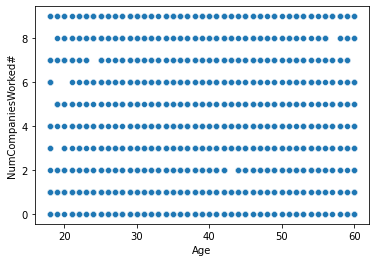

In [109]:
sns.scatterplot(data=data, x="Age", y="NumCompaniesWorked#")

In [110]:
data.corr()

,Age,DailyRate($),DistanceFromHome,Education,EnvironmentSatisfaction,JobLevel,JobSatisfaction,MonthlyIncome($),NumCompaniesWorked#,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.003999,0.026586,0.100449,-0.020186,0.273662,-0.017906,0.252252,0.161505,0.027612,0.035209,0.031575,0.321211,-0.009523,-0.012633,0.134480,0.098930,0.163758,0.102097
DailyRate($),0.003999,1.000000,-0.019009,-0.017449,-0.003279,0.001778,0.041983,-0.019822,0.009523,0.024086,0.022696,0.012421,0.004500,0.000404,-0.032699,0.008842,-0.025357,-0.022542,-0.031149
DistanceFromHome,0.026586,-0.019009,1.000000,0.009531,-0.040651,0.101678,-0.073271,0.116044,0.107807,0.136777,0.124437,0.135599,0.150133,0.001234,-0.062584,0.192005,0.149418,0.205382,0.191565
Education,0.100449,-0.017449,0.009531,1.000000,-0.007725,0.075015,-0.015471,0.048620,0.053461,0.000805,0.015904,0.025894,0.068291,-0.004056,0.054530,0.012958,0.053422,0.045881,0.043958
EnvironmentSatisfaction,-0.020186,-0.003279,-0.040651,-0.007725,1.000000,-0.040879,-0.005878,-0.049024,-0.045212,-0.051349,-0.071090,-0.037209,-0.056238,-0.020954,0.018863,-0.091476,-0.027966,-0.062970,-0.050274
JobLevel,0.273662,0.001778,0.101678,0.075015,-0.040879,1.000000,-0.029845,0.558361,0.171020,0.090452,0.135390,0.120268,0.430301,0.035397,-0.017646,0.357874,0.340597,0.321795,0.284996
JobSatisfaction,-0.017906,0.041983,-0.073271,-0.015471,-0.005878,-0.029845,1.000000,-0.037545,-0.084509,-0.023988,-0.038074,-0.042566,-0.053368,-0.008192,-0.022932,-0.073682,-0.066293,-0.084766,-0.046241
MonthlyIncome($),0.252252,-0.019822,0.116044,0.048620,-0.049024,0.558361,-0.037545,1.000000,0.196312,0.124770,0.151449,0.133658,0.477945,0.025348,-0.008293,0.346322,0.299813,0.329694,0.317804
NumCompaniesWorked#,0.161505,0.009523,0.107807,0.053461,-0.045212,0.171020,-0.084509,0.196312,1.000000,0.089671,0.144660,0.084682,0.233665,-0.020491,0.004922,0.144834,0.117897,0.187923,0.088534
PercentSalaryHike,0.027612,0.024086,0.136777,0.000805,-0.051349,0.090452,-0.023988,0.124770,0.089671,1.000000,0.450837,0.098722,0.113267,-0.013894,-0.064227,0.166207,0.172493,0.159940,0.168858


Doesn't look there's a pattern to the number of companies worked and age, so let's just impute the mean

In [111]:
data["NumCompaniesWorked#"] = data["NumCompaniesWorked#"].fillna(data["NumCompaniesWorked#"].mean())

In [112]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate($)                0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobLevel                    0
Job+Role                    0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome($)            0
NumCompaniesWorked#         0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
StockOptionLevel           26
TotalWorkingYears           1
TrainingTimesLastYear       2
WorkLifeBalance             0
YearsAtCompany              2
YearsInCurrentRole          8
YearsSinceLastPromotion    12
YearsWithCurrManager        3
dtype: int64

In [113]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate($)                0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobLevel                    0
Job+Role                    0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome($)            0
NumCompaniesWorked#         0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
StockOptionLevel           26
TotalWorkingYears           1
TrainingTimesLastYear       2
WorkLifeBalance             0
YearsAtCompany              2
YearsInCurrentRole          8
YearsSinceLastPromotion    12
YearsWithCurrManager        3
dtype: int64

In [114]:
pd.pivot_table(data, values=['TrainingTimesLastYear'],columns=['JobLevel'], aggfunc=np.mean)

JobLevel,1,2,3,4,5
TrainingTimesLastYear,2.855601,2.808123,2.84466,3.029412,2.987654


In [115]:
#Lets just remove na's from training times last year as it does not seem to be highly correlated with any other variables nor different by job level
data = data.dropna(subset="TrainingTimesLastYear")

In [116]:
data["YearsAtCompany"].describe()

count    2414.000000
mean       11.985501
std        10.703952
min         0.000000
25%         4.000000
50%         8.000000
75%        19.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

In [117]:
data.describe()

,Age,DailyRate($),DistanceFromHome,Education,EnvironmentSatisfaction,JobLevel,JobSatisfaction,MonthlyIncome($),NumCompaniesWorked#,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2390.000000,2415.000000,2416.000000,2416.000000,2414.000000,2408.000000,2404.000000,2413.000000
mean,37.840646,800.268626,11.598096,2.937500,2.618791,2.418874,2.632450,8096.728891,3.460772,16.279801,3.294702,1.072803,14.544513,2.875000,2.678808,11.985501,6.127076,4.339434,5.861998
std,10.527646,403.146296,8.756677,1.208247,1.116766,1.309323,1.109271,5423.106630,2.790646,4.176681,0.456003,1.022012,10.411838,1.594796,0.890426,10.703952,4.984526,4.678468,4.775605
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,452.750000,4.000000,2.000000,2.000000,1.000000,2.000000,3561.250000,1.000000,13.000000,3.000000,0.000000,6.000000,2.000000,2.000000,4.000000,2.000000,0.000000,2.000000
50%,37.000000,800.500000,9.000000,3.000000,3.000000,2.000000,3.000000,6266.500000,3.000000,15.000000,3.000000,1.000000,11.000000,3.000000,3.000000,8.000000,5.000000,2.000000,5.000000
75%,46.000000,1149.000000,19.000000,4.000000,4.000000,3.000000,4.000000,11958.000000,6.000000,19.000000,4.000000,2.000000,21.000000,4.000000,3.000000,19.000000,9.000000,7.000000,9.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [118]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate($)                0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobLevel                    0
Job+Role                    0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome($)            0
NumCompaniesWorked#         0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
StockOptionLevel           26
TotalWorkingYears           1
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              2
YearsInCurrentRole          8
YearsSinceLastPromotion    12
YearsWithCurrManager        3
dtype: int64

In [119]:
#dropping nulls from columns with few missing values 

data = data.dropna(subset=['YearsAtCompany',"YearsInCurrentRole","YearsWithCurrManager","YearsSinceLastPromotion","TotalWorkingYears"])

In [120]:
pd.pivot_table(data, values=['JobLevel'],columns=['StockOptionLevel'], aggfunc=np.median)

StockOptionLevel,0.0,1.0,2.0,3.0
JobLevel,2,2,2,3


In [121]:
#It looks like Stock Option Level is Correlated with Monthly Income
pd.pivot_table(data, values=['MonthlyIncome($)'],columns=['StockOptionLevel'], aggfunc=np.median)

StockOptionLevel,0.0,1.0,2.0,3.0
MonthlyIncome($),5500.0,6397.0,6549.0,9055.5


In [122]:
#This data will not make sense to bin because while on average, higher stock option level correlates to  a higher income, the minimum
# incomes are spread evenly across levels
pd.pivot_table(data, values=['MonthlyIncome($)'],columns=['StockOptionLevel'], aggfunc=np.min)

StockOptionLevel,0.0,1.0,2.0,3.0
MonthlyIncome($),1009,1061,1012,1127


In [125]:
#We will therefore drop the nulls of StockOptionLevel as they only represent 1% of the data
data["StockOptionLevel"]= data["StockOptionLevel"].dropna()

In [127]:
data.dropna(subset=['StockOptionLevel'], inplace=True)


In [128]:
#missing value imputation complete
data.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
DailyRate($)               0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
Gender                     0
JobLevel                   0
Job+Role                   0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome($)           0
NumCompaniesWorked#        0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
WorkLifeBalance            0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2371 entries, 1 to 2417
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      2371 non-null   int64  
 1   Attrition                2371 non-null   object 
 2   BusinessTravel           2371 non-null   object 
 3   DailyRate($)             2371 non-null   int64  
 4   Department               2371 non-null   object 
 5   DistanceFromHome         2371 non-null   int64  
 6   Education                2371 non-null   int64  
 7   EducationField           2371 non-null   object 
 8   EnvironmentSatisfaction  2371 non-null   int64  
 9   Gender                   2371 non-null   object 
 10  JobLevel                 2371 non-null   int64  
 11  Job+Role                 2371 non-null   object 
 12  JobSatisfaction          2371 non-null   int64  
 13  MaritalStatus            2371 non-null   object 
 14  MonthlyIncome($)        

In [130]:
data["Job+Role"].value_counts()

Sales Executive              543
Laboratory Technician        494
Research Scientist           471
Sales Representative         211
Manufacturing Director       183
Healthcare Representative    165
Manager                      119
Human Resources               98
Research Director             87
Name: Job+Role, dtype: int64

In [131]:
#redundant because of monthly rate
data = data.drop(columns=["DailyRate($)"])

In [132]:
#Encoding
data.loc[data['Attrition']=="Yes",'Attrition']=1
data.loc[data['Attrition']=="No",'Attrition']=0

In [133]:
data["Attrition"] = data["Attrition"].astype(int)

In [134]:
data["BusinessTravel"].value_counts()

Travel_Rarely        1324
Travel_Frequently     577
Non-Travel            470
Name: BusinessTravel, dtype: int64

In [135]:
#ordinal encoding makes sense here
data.loc[data['BusinessTravel']=="Travel_Frequently",'BusinessTravel']=2
data.loc[data['BusinessTravel']=="Travel_Rarely",'BusinessTravel']=1
data.loc[data['BusinessTravel']=="Non-Travel",'BusinessTravel']=0
data["BusinessTravel"] = data["BusinessTravel"].astype(int)


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2371 entries, 1 to 2417
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      2371 non-null   int64  
 1   Attrition                2371 non-null   int32  
 2   BusinessTravel           2371 non-null   int32  
 3   Department               2371 non-null   object 
 4   DistanceFromHome         2371 non-null   int64  
 5   Education                2371 non-null   int64  
 6   EducationField           2371 non-null   object 
 7   EnvironmentSatisfaction  2371 non-null   int64  
 8   Gender                   2371 non-null   object 
 9   JobLevel                 2371 non-null   int64  
 10  Job+Role                 2371 non-null   object 
 11  JobSatisfaction          2371 non-null   int64  
 12  MaritalStatus            2371 non-null   object 
 13  MonthlyIncome($)         2371 non-null   int64  
 14  NumCompaniesWorked#     

In [137]:
data["EducationField"].value_counts()

Life Sciences       933
Medical             705
Marketing           300
Technical Degree    259
Other               122
Human Resources      52
Name: EducationField, dtype: int64

In [138]:
#We will drop department and education field because ordinal encoding does not make sense and we will fall into dummy trap if we make dummies
data = data.drop(columns=["EducationField","Department"])

In [139]:
#We will drop job+role for the same reason
data = data.drop(columns=["Job+Role"])

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2371 entries, 1 to 2417
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      2371 non-null   int64  
 1   Attrition                2371 non-null   int32  
 2   BusinessTravel           2371 non-null   int32  
 3   DistanceFromHome         2371 non-null   int64  
 4   Education                2371 non-null   int64  
 5   EnvironmentSatisfaction  2371 non-null   int64  
 6   Gender                   2371 non-null   object 
 7   JobLevel                 2371 non-null   int64  
 8   JobSatisfaction          2371 non-null   int64  
 9   MaritalStatus            2371 non-null   object 
 10  MonthlyIncome($)         2371 non-null   int64  
 11  NumCompaniesWorked#      2371 non-null   float64
 12  OverTime                 2371 non-null   object 
 13  PercentSalaryHike        2371 non-null   int64  
 14  PerformanceRating       

In [141]:
data["Gender"].value_counts()

Male      1451
Female     920
Name: Gender, dtype: int64

In [142]:
data.loc[data['Gender']=="Male",'Gender']=1
data.loc[data['Gender']=="Female",'Gender']=0
data["Gender"] = data["Gender"].astype(int)

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2371 entries, 1 to 2417
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      2371 non-null   int64  
 1   Attrition                2371 non-null   int32  
 2   BusinessTravel           2371 non-null   int32  
 3   DistanceFromHome         2371 non-null   int64  
 4   Education                2371 non-null   int64  
 5   EnvironmentSatisfaction  2371 non-null   int64  
 6   Gender                   2371 non-null   int32  
 7   JobLevel                 2371 non-null   int64  
 8   JobSatisfaction          2371 non-null   int64  
 9   MaritalStatus            2371 non-null   object 
 10  MonthlyIncome($)         2371 non-null   int64  
 11  NumCompaniesWorked#      2371 non-null   float64
 12  OverTime                 2371 non-null   object 
 13  PercentSalaryHike        2371 non-null   int64  
 14  PerformanceRating       

In [144]:
data["MaritalStatus"].value_counts()

Married     994
Single      922
Divorced    455
Name: MaritalStatus, dtype: int64

In [145]:
#Ordinal Encoding Again

data.loc[data['MaritalStatus']=="Married",'MaritalStatus']=2
data.loc[data['MaritalStatus']=="Divorced",'MaritalStatus']=1
data.loc[data['MaritalStatus']=="Single",'MaritalStatus']=0
data["MaritalStatus"] = data["MaritalStatus"].astype(int)

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2371 entries, 1 to 2417
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      2371 non-null   int64  
 1   Attrition                2371 non-null   int32  
 2   BusinessTravel           2371 non-null   int32  
 3   DistanceFromHome         2371 non-null   int64  
 4   Education                2371 non-null   int64  
 5   EnvironmentSatisfaction  2371 non-null   int64  
 6   Gender                   2371 non-null   int32  
 7   JobLevel                 2371 non-null   int64  
 8   JobSatisfaction          2371 non-null   int64  
 9   MaritalStatus            2371 non-null   int32  
 10  MonthlyIncome($)         2371 non-null   int64  
 11  NumCompaniesWorked#      2371 non-null   float64
 12  OverTime                 2371 non-null   object 
 13  PercentSalaryHike        2371 non-null   int64  
 14  PerformanceRating       

In [147]:
data["OverTime"].value_counts()

No     1461
Yes     910
Name: OverTime, dtype: int64

In [148]:
data.loc[data['OverTime']=="Yes",'OverTime']=1
data.loc[data['OverTime']=="No",'OverTime']=0
data["OverTime"] = data["OverTime"].astype(int)

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2371 entries, 1 to 2417
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      2371 non-null   int64  
 1   Attrition                2371 non-null   int32  
 2   BusinessTravel           2371 non-null   int32  
 3   DistanceFromHome         2371 non-null   int64  
 4   Education                2371 non-null   int64  
 5   EnvironmentSatisfaction  2371 non-null   int64  
 6   Gender                   2371 non-null   int32  
 7   JobLevel                 2371 non-null   int64  
 8   JobSatisfaction          2371 non-null   int64  
 9   MaritalStatus            2371 non-null   int32  
 10  MonthlyIncome($)         2371 non-null   int64  
 11  NumCompaniesWorked#      2371 non-null   float64
 12  OverTime                 2371 non-null   int32  
 13  PercentSalaryHike        2371 non-null   int64  
 14  PerformanceRating       

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'BusinessTravel'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MaritalStatus'}>],
       [<AxesSubplot:title={'center':'MonthlyIncome($)'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked#'}>,
        <AxesSubplot:title={'center':'OverTime'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'PerformanceRating'}>],
       [<AxesSubplot:title={'center':'StockOptionLevel'}>,
        <AxesSubplot:title={'center':'TotalWorkingYears'}>,
        <AxesSubplot:title={'center':'Tr

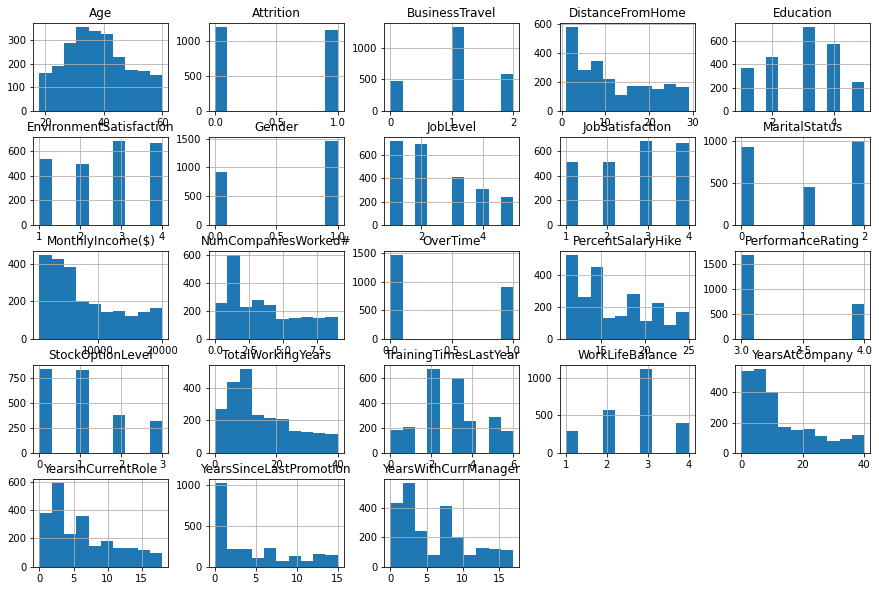

In [151]:
data.hist(figsize = (15,10))

In [152]:
x = data.loc[:,data.columns!='Attrition']
y = data['Attrition']

KNN Classifier with Scaling

In [153]:
from sklearn.preprocessing import StandardScaler
scaler_knn = StandardScaler()
ssknn = scaler_knn.fit_transform(x)
x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(ssknn,y, test_size=0.3)

In [154]:
knn = KNeighborsClassifier()
knn.fit(x_train_knn,y_train_knn)

KNeighborsClassifier()

In [155]:
knn_pred = knn.predict(x_test_knn)

In [156]:
from sklearn.metrics import classification_report

In [157]:
target_names = ['Left', 'Stayed']
print(classification_report(y_test_knn, knn_pred, target_names=target_names))

              precision    recall  f1-score   support

        Left       0.69      0.97      0.81       366
      Stayed       0.95      0.54      0.69       346

    accuracy                           0.76       712
   macro avg       0.82      0.76      0.75       712
weighted avg       0.82      0.76      0.75       712



Classification Report Identifies Precision, Recall, f1-score, and accuracy metrics

In [158]:
print('Training set score: {:.4f}'.format(knn.score(x_train_knn, y_train_knn)))

print('Test set score: {:.4f}'.format(knn.score(x_test_knn, y_test_knn)))

Training set score: 0.8403
Test set score: 0.7640


Slight Overfitting

KNN Using SMOTE and Scaling

In [159]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [160]:
from sklearn.model_selection import cross_validate

In [161]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
pipe = Pipeline(steps = [('smote', SMOTE(random_state = 42)), 
                      ('standardscaler', StandardScaler()),
                      ('knn', KNeighborsClassifier())])
pipe.fit(x_train, y_train)
cv_results = cross_validate(pipe, x_train, y_train)
sorted(cv_results.keys())
['fit_time', 'score_time', 'test_score']
cv_results['test_score']

array([0.81325301, 0.77409639, 0.77710843, 0.80421687, 0.78549849])

 KNN GridSearch

In [162]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(x_train_knn, y_train_knn)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [163]:
grid_search.best_params_

{'n_neighbors': 5}

In [170]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(x_train_knn,y_train_knn)
knn_pred2 = knn2.predict(x_test_knn)
target_names = ['Left','Stayed']
print(classification_report(y_test_knn, knn_pred2, target_names=target_names))

              precision    recall  f1-score   support

        Left       0.69      0.97      0.81       366
      Stayed       0.95      0.54      0.69       346

    accuracy                           0.76       712
   macro avg       0.82      0.76      0.75       712
weighted avg       0.82      0.76      0.75       712



In [168]:
precision_score(y_test_knn, knn_pred2)

0.9494949494949495

In [169]:
recall_score(y_test_knn, knn_pred2)

0.5433526011560693

Text(0, 0.5, 'True Positive Rate')

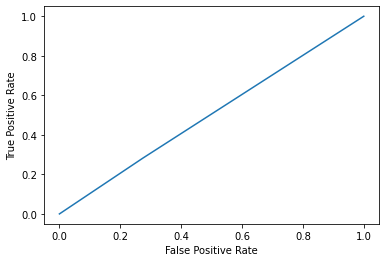

In [165]:
fpr, tpr, thresholds = roc_curve(y_test, knn_pred2)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

KNN isn't bad, with an average f1 score of 0.8, lets try Random Forest. This model is good a correctly prediciting cases where an employee left as indicated by high precision, but is poor at predicting all instances of attrition as indicated by low recall. This is visualized on the ROC curve

Random Forest Classifier

In [171]:
from sklearn.ensemble import RandomForestClassifier

In [172]:
rf = RandomForestClassifier()

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [175]:
rf_pred = rf.predict(x_test)

In [176]:
target_names = ['Left','Stayed']
print(classification_report(y_test, rf_pred, target_names=target_names))

              precision    recall  f1-score   support

        Left       0.85      0.93      0.89       354
      Stayed       0.92      0.84      0.88       358

    accuracy                           0.89       712
   macro avg       0.89      0.89      0.89       712
weighted avg       0.89      0.89      0.89       712



In [179]:
precision_score(y_test, rf_pred)

0.9235474006116208

In [178]:
recall_score(y_test, rf_pred)

0.8435754189944135

Text(0, 0.5, 'True Positive Rate')

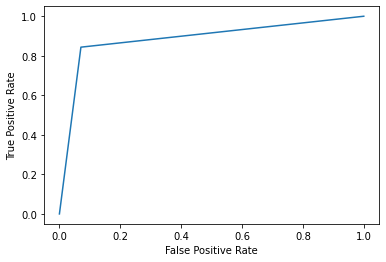

In [177]:
fpr, tpr, thresholds = roc_curve(y_test, rf_pred)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Much better. f1-score and accuracy of 0.90. ROC Curve also looks better as a result of higher recall

Random Forest GridSearch

GridSearch will test the different hyperparameters we set in the param grid and finds the best selection for the data

In [181]:
param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [182]:
from sklearn.model_selection import GridSearchCV

In [183]:
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

c:\Users\chris\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\chris\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\chris\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [184]:
CV_rfc.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2'}

In [185]:
rf2=RandomForestClassifier(max_features='log2', max_depth=8, criterion='entropy')

In [186]:
rf2.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2')

In [187]:
rf2_pred = rf2.predict(x_test)

In [188]:
target_names = ['Left','Stayed']
print(classification_report(y_test, rf2_pred, target_names=target_names))

              precision    recall  f1-score   support

        Left       0.83      0.94      0.88       354
      Stayed       0.93      0.81      0.87       358

    accuracy                           0.87       712
   macro avg       0.88      0.87      0.87       712
weighted avg       0.88      0.87      0.87       712



In [191]:
precision_score(y_test, rf2_pred)

0.9267515923566879

In [192]:
recall_score(y_test, rf2_pred)

0.8128491620111732

Text(0, 0.5, 'True Positive Rate')

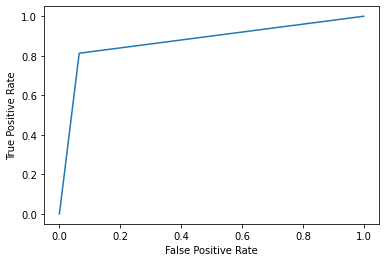

In [189]:
fpr, tpr, thresholds = roc_curve(y_test, rf2_pred)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Very similar results to original random forest

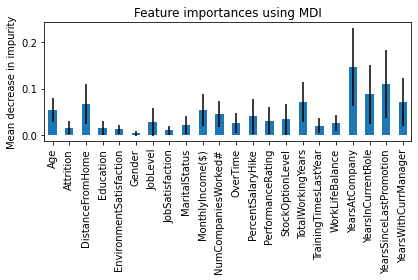

In [193]:
importances =rf2.feature_importances_
feature_names = [x for i,x in enumerate(data.columns) if i!=2]
feature_names
import matplotlib.pyplot as plt
import numpy as np
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in rf2.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

The feature importance graph identifies that Years at the company and years since last promotion were the most important factors in determining attrition.

SMOTE

Lets Try Random Forest with balanced classes (Not really necessary since they were already fairly balanced, but lets give it a shot)

In [194]:
from imblearn.over_sampling import SMOTE

In [195]:
smote = SMOTE()

In [196]:
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [197]:
from collections import Counter #balancing done 
print("Before:", Counter(y_train))
print("After:", Counter(y_train_smote))

Before: Counter({0: 847, 1: 812})
After: Counter({0: 847, 1: 847})


(array([847.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 847.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

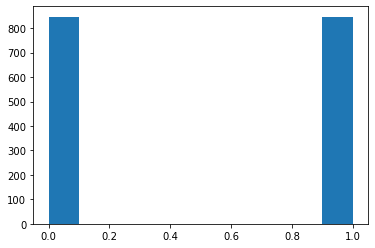

In [198]:
plt.hist(y_train_smote)

Random Forest with Balanced Data

In [199]:
rf3=RandomForestClassifier(max_features='log2', max_depth=6, criterion='gini')

In [200]:
rf3.fit(x_train_smote,y_train_smote)

RandomForestClassifier(max_depth=6, max_features='log2')

In [202]:
rf3_pred = rf3.predict(x_test)

In [203]:
target_names = ['Left','Stayed']
print(classification_report(y_test, rf3_pred, target_names=target_names))

              precision    recall  f1-score   support

        Left       0.82      0.92      0.87       354
      Stayed       0.91      0.80      0.85       358

    accuracy                           0.86       712
   macro avg       0.86      0.86      0.86       712
weighted avg       0.86      0.86      0.86       712



In [205]:
precision_score(y_test, rf3_pred)

0.9079365079365079

In [206]:
recall_score(y_test, rf3_pred)

0.7988826815642458

Text(0, 0.5, 'True Positive Rate')

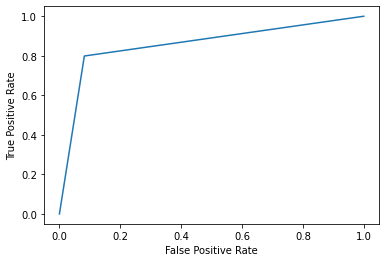

In [207]:
fpr, tpr, thresholds = roc_curve(y_test, rf3_pred)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Similar results as expected

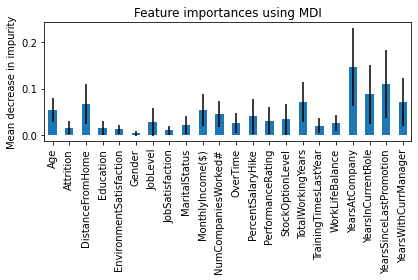

In [208]:
importances =rf2.feature_importances_
feature_names = [x for i,x in enumerate(data.columns) if i!=2]
feature_names
import matplotlib.pyplot as plt
import numpy as np
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in rf2.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

AdaBoost Classifier

Adaboost is a boosting ensemble method that is similar to random forest, but trees do not get equal votes like in random forest.

In [209]:
from sklearn.ensemble import AdaBoostClassifier

In [210]:
adaBoost = AdaBoostClassifier(base_estimator=None,
                              learning_rate=1.0,
                              n_estimators=100)

In [211]:
ada_model = adaBoost.fit(x_train, y_train)

In [212]:
ada_pred = adaBoost.predict(x_test)

In [213]:
ada_model2 = adaBoost.fit(x_train_smote, y_train_smote)

In [214]:
ada_pred2 = adaBoost.predict(x_test)

In [215]:
target_names = ['Left','Stayed']
print(classification_report(y_test, ada_pred, target_names=target_names))

              precision    recall  f1-score   support

        Left       0.86      0.90      0.88       354
      Stayed       0.89      0.85      0.87       358

    accuracy                           0.88       712
   macro avg       0.88      0.88      0.88       712
weighted avg       0.88      0.88      0.88       712



In [216]:
precision_score(y_test, ada_pred)

0.8947368421052632

In [217]:
recall_score(y_test, ada_pred)

0.8547486033519553

Text(0, 0.5, 'True Positive Rate')

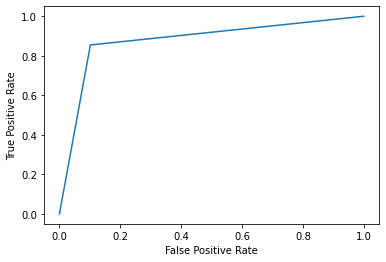

In [218]:
fpr, tpr, thresholds = roc_curve(y_test, ada_pred)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [219]:
target_names = ['Left','Stayed']
print(classification_report(y_test, ada_pred2, target_names=target_names))

              precision    recall  f1-score   support

        Left       0.86      0.89      0.88       354
      Stayed       0.89      0.86      0.87       358

    accuracy                           0.87       712
   macro avg       0.87      0.87      0.87       712
weighted avg       0.87      0.87      0.87       712



In [220]:
precision_score(y_test, ada_pred2)

0.8872832369942196

In [221]:
recall_score(y_test, ada_pred2)

0.8575418994413407

Text(0, 0.5, 'True Positive Rate')

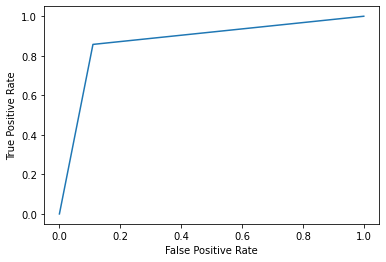

In [222]:
fpr, tpr, thresholds = roc_curve(y_test, ada_pred2)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Adaboost performed somewhat similar to Random Forest, with balance and non-balanced fairly similar

CatBoost Classifier

Catboost Classifier has built in cross validation capability that should yield the best results

In [223]:
from catboost import CatBoostClassifier

In [226]:
#Eval metric is set to F1 to maximize the performance of the model
cat_model = CatBoostClassifier(eval_metric='F1',use_best_model=True,random_seed=42)

In [227]:
cat_model.fit(x_train,y_train,eval_set=(x_test,y_test))

Learning rate set to 0.03591
0:	learn: 0.7953368	test: 0.7595712	best: 0.7595712 (0)	total: 135ms	remaining: 2m 15s
1:	learn: 0.8015979	test: 0.7808642	best: 0.7808642 (1)	total: 137ms	remaining: 1m 8s
2:	learn: 0.8215712	test: 0.8140244	best: 0.8140244 (2)	total: 140ms	remaining: 46.5s
3:	learn: 0.8378557	test: 0.8265460	best: 0.8265460 (3)	total: 142ms	remaining: 35.3s
4:	learn: 0.8465056	test: 0.8333333	best: 0.8333333 (4)	total: 144ms	remaining: 28.6s
5:	learn: 0.8504246	test: 0.8372781	best: 0.8372781 (5)	total: 146ms	remaining: 24.2s
6:	learn: 0.8543436	test: 0.8462665	best: 0.8462665 (6)	total: 148ms	remaining: 21s
7:	learn: 0.8511749	test: 0.8445748	best: 0.8462665 (6)	total: 149ms	remaining: 18.5s
8:	learn: 0.8506494	test: 0.8454810	best: 0.8462665 (6)	total: 151ms	remaining: 16.6s
9:	learn: 0.8530559	test: 0.8454810	best: 0.8462665 (6)	total: 152ms	remaining: 15.1s
10:	learn: 0.8569571	test: 0.8404100	best: 0.8462665 (6)	total: 154ms	remaining: 13.8s
11:	learn: 0.8576998	test

In [228]:
catpred = cat_model.predict(x_test)

In [229]:
target_names = ['Left','Stayed']
print(classification_report(y_test, catpred, target_names=target_names))

              precision    recall  f1-score   support

        Left       0.87      0.95      0.90       354
      Stayed       0.94      0.85      0.90       358

    accuracy                           0.90       712
   macro avg       0.90      0.90      0.90       712
weighted avg       0.90      0.90      0.90       712



In [230]:
precision_score(y_test, catpred)

0.9415384615384615

In [231]:
recall_score(y_test, catpred)

0.8547486033519553

Text(0, 0.5, 'True Positive Rate')

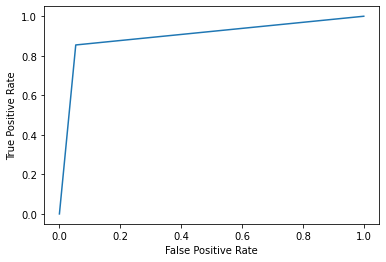

In [232]:
fpr, tpr, thresholds = roc_curve(y_test, catpred)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [233]:
cat_model.fit(x_train_smote,y_train_smote,eval_set=(x_test,y_test))

Learning rate set to 0.036095
0:	learn: 0.7896774	test: 0.7675841	best: 0.7675841 (0)	total: 2.44ms	remaining: 2.44s
1:	learn: 0.8196517	test: 0.7851852	best: 0.7851852 (1)	total: 4.44ms	remaining: 2.22s
2:	learn: 0.8369769	test: 0.8281938	best: 0.8281938 (2)	total: 6.43ms	remaining: 2.14s
3:	learn: 0.8484092	test: 0.8367953	best: 0.8367953 (3)	total: 8.1ms	remaining: 2.02s
4:	learn: 0.8551896	test: 0.8491124	best: 0.8491124 (4)	total: 10.2ms	remaining: 2.04s
5:	learn: 0.8523364	test: 0.8458150	best: 0.8491124 (4)	total: 12.1ms	remaining: 2.01s
6:	learn: 0.8583905	test: 0.8466077	best: 0.8491124 (4)	total: 14.1ms	remaining: 2s
7:	learn: 0.8548287	test: 0.8529412	best: 0.8529412 (7)	total: 15.7ms	remaining: 1.95s
8:	learn: 0.8503741	test: 0.8466077	best: 0.8529412 (7)	total: 17.4ms	remaining: 1.91s
9:	learn: 0.8477315	test: 0.8475073	best: 0.8529412 (7)	total: 19.1ms	remaining: 1.89s
10:	learn: 0.8461538	test: 0.8462665	best: 0.8529412 (7)	total: 20.8ms	remaining: 1.87s
11:	learn: 0.850

In [234]:
cat_pred2 = cat_model.predict(x_test)

In [235]:
target_names = ['Left','Stayed']
print(classification_report(y_test, cat_pred2, target_names=target_names))

              precision    recall  f1-score   support

        Left       0.87      0.94      0.91       354
      Stayed       0.94      0.86      0.90       358

    accuracy                           0.90       712
   macro avg       0.90      0.90      0.90       712
weighted avg       0.90      0.90      0.90       712



In [237]:
precision_score(y_test, catpred)

0.9415384615384615

In [238]:
recall_score(y_test, catpred)

0.8547486033519553

Text(0, 0.5, 'True Positive Rate')

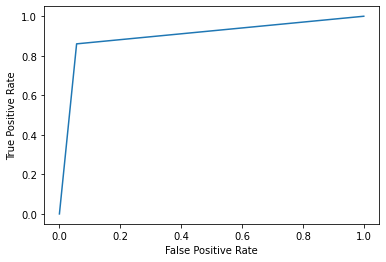

In [239]:
fpr, tpr, thresholds = roc_curve(y_test, cat_pred2)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Catboost performs very well and is so far the best of the models we have tried. F1-Score and Accuracy of 0.91! ROC Curve also looks great!

XGBoost Classifier

One last model to try

In [240]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100)

In [241]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [242]:
xgb_pred = xgb.predict(x_test)

In [243]:
target_names = ['Left','Stayed']
print(classification_report(y_test, xgb_pred, target_names=target_names))

              precision    recall  f1-score   support

        Left       0.87      0.91      0.89       354
      Stayed       0.90      0.87      0.89       358

    accuracy                           0.89       712
   macro avg       0.89      0.89      0.89       712
weighted avg       0.89      0.89      0.89       712



Text(0, 0.5, 'True Positive Rate')

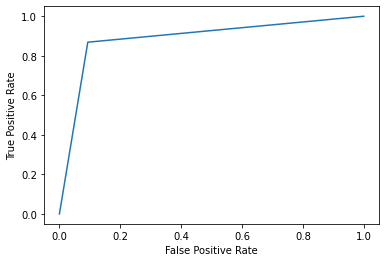

In [244]:
fpr, tpr, thresholds = roc_curve(y_test, xgb_pred)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [245]:
#Using Balanced Data from SMOTE
xgb.fit(x_train_smote,y_train_smote)
xgb_pred2 = xgb.predict(x_test)
target_names = ['Left','Stayed']
print(classification_report(y_test, xgb_pred2, target_names=target_names))

              precision    recall  f1-score   support

        Left       0.87      0.91      0.89       354
      Stayed       0.91      0.87      0.89       358

    accuracy                           0.89       712
   macro avg       0.89      0.89      0.89       712
weighted avg       0.89      0.89      0.89       712



Text(0, 0.5, 'True Positive Rate')

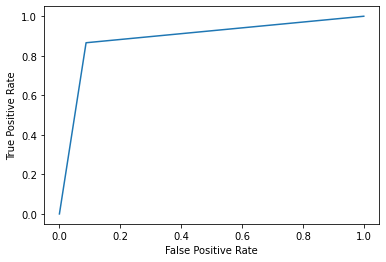

In [246]:
fpr, tpr, thresholds = roc_curve(y_test, xgb_pred2)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

XGBoost also performs very well, but Catboost slightly edged it

Recommendations: The results from this classification analysis indicate some factors that may be leading towards attrition. This can be seen on the feature importance graph of the random forest model. The longer it has been since a promotion, the more likely an employee is to leave the company. The amount of years that an employee has worked also seems to be a strong factor for the decision to leave the company. Another interesting factor is the distance an employee lives from home. Job satisfaction seems to be a minor factor, which could indicate that employees are not being honest during surveys. Some recommendations from these results would be to better incentivize people to remain at the company through promotions (if they have performed well). The company may also find it beneficial to provide more remote  work opportunity to reduce distance from the company to be a determining factor. 

Predictive Feasibility: The boosting and random forest models used in the notebook will be very good for predicting whether an employee will leave the company. With F1 scores near or at 90% as well as success in other metrics described in the notebook, the predictive capability of these models can be relied upon. My personal recommenation would be to use the catboost model for future predictions.